In [1]:
import sys
sys.path.insert(0, '../../')

import joblib
import pandas as pd
import numpy as np

from pdpbox.info_plots import target_plot
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## test regressor

In [2]:
test_ross = joblib.load('test_ross.pkl')

ross_data = test_ross['data']
ross_features = test_ross['features']
ross_target = test_ross['target']
ross_model = test_ross['rf_model']

## test actual plot

In [3]:
import sys
sys.path.insert(0, '../../')

from pdpbox.info_plots import actual_plot

#### binary feature

../../pdpbox\info_plots.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  info_df['actual_prediction'] = prediction


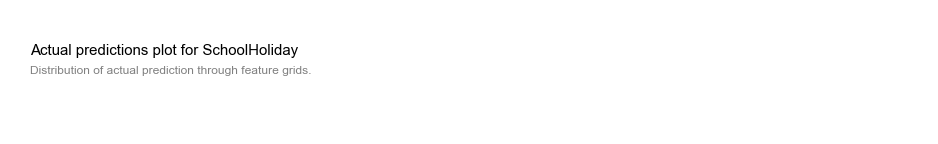

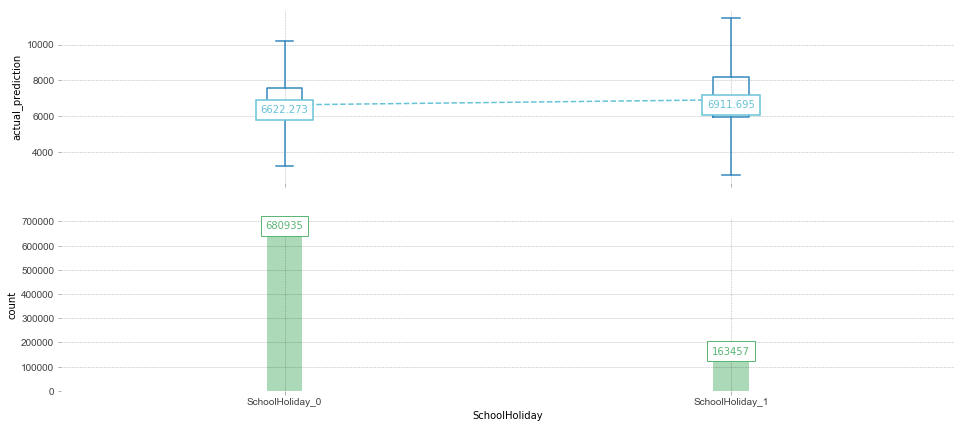

In [4]:
axes, df = actual_plot(model=ross_model, X=ross_data[ross_features], feature='SchoolHoliday', feature_name='SchoolHoliday')

In [5]:
df

,x,display_column,count,actual_prediction_q1,actual_prediction_q2,actual_prediction_q3
0,0,SchoolHoliday_0,680935,5828.145813,6622.272652,7577.496478
1,1,SchoolHoliday_1,163457,5941.953128,6911.694636,8157.970575


#### onehot encoding features

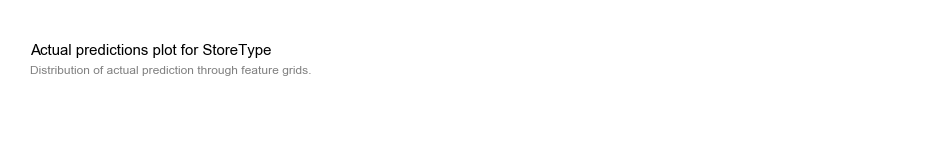

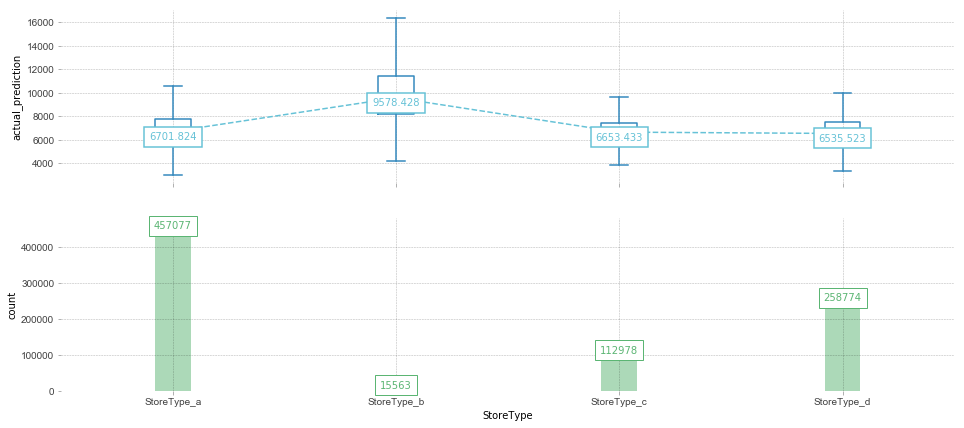

In [6]:
axes, df = actual_plot(model=ross_model, X=ross_data[ross_features], 
                       feature=['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d'], feature_name='StoreType')

In [7]:
df

,x,display_column,count,actual_prediction_q1,actual_prediction_q2,actual_prediction_q3
0,0,StoreType_a,457077,5822.815972,6701.824226,7730.564152
1,1,StoreType_b,15563,8155.860114,9578.427701,11443.330958
2,2,StoreType_c,112978,6007.973935,6653.432827,7470.281513
3,3,StoreType_d,258774,5827.154238,6535.522843,7502.296154


#### numeric feature

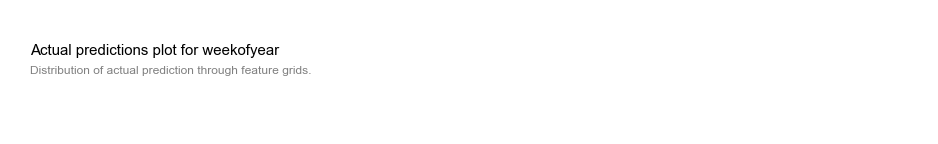

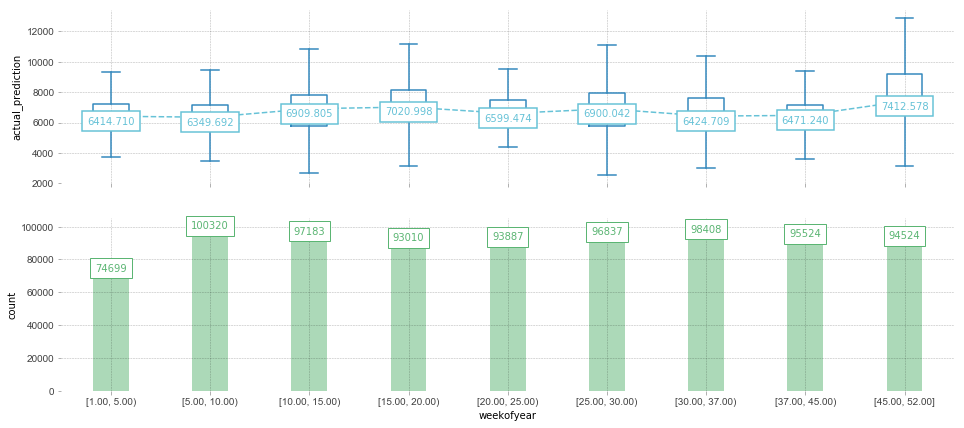

In [8]:
axes, df = actual_plot(model=ross_model, 
                       X=ross_data[ross_features], 
                       feature='weekofyear', 
                       feature_name='weekofyear', 
                       num_grid_points=10, 
                       grid_type='percentile', 
                       percentile_range=None, 
                       grid_range=None, 
                       cust_grid_points=None, 
                       show_percentile=False, 
                       show_outliers=False, 
                       which_classes=None, 
                       predict_kwds={}, 
                       ncols=2, 
                       figsize=None, 
                       plot_params=None)

In [9]:
df

,x,display_column,count,actual_prediction_q1,actual_prediction_q2,actual_prediction_q3
0,0,"[1.00, 5.00)",74699,5828.575845,6414.709793,7249.606068
1,1,"[5.00, 10.00)",100320,5571.090689,6349.691503,7150.833879
2,2,"[10.00, 15.00)",97183,5757.486750,6909.805470,7817.497664
3,3,"[15.00, 20.00)",93010,6130.498788,7020.997658,8159.699844
4,4,"[20.00, 25.00)",93887,6073.027208,6599.473723,7455.393664
5,5,"[25.00, 30.00)",96837,5746.654906,6900.042337,7928.553001
6,6,"[30.00, 37.00)",98408,5721.631257,6424.708778,7587.495796
7,7,"[37.00, 45.00)",95524,5713.472815,6471.239785,7180.184889
8,8,"[45.00, 52.00]",94524,6541.190649,7412.577743,9172.505219


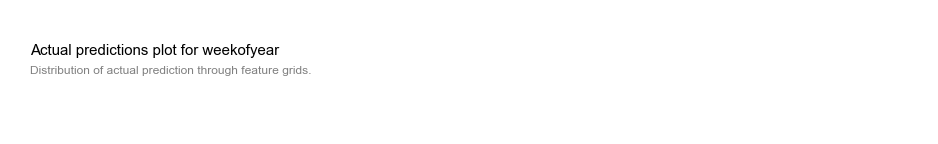

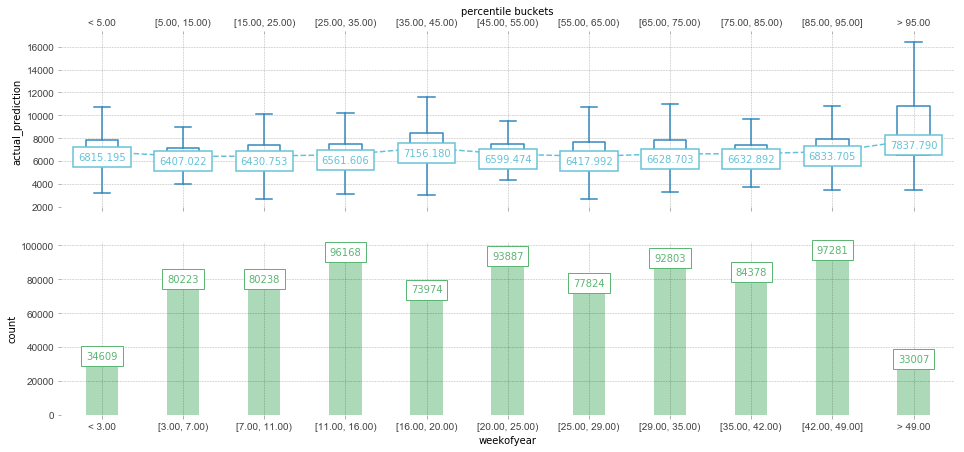

In [10]:
# show_percentile, percentile_range, show_outliers
axes, df = actual_plot(model=ross_model, 
                       X=ross_data[ross_features], 
                       feature='weekofyear', 
                       feature_name='weekofyear', 
                       num_grid_points=10, 
                       grid_type='percentile', 
                       percentile_range=(5, 95), 
                       grid_range=None, 
                       cust_grid_points=None, 
                       show_percentile=True, 
                       show_outliers=True, 
                       which_classes=None, 
                       predict_kwds={}, 
                       ncols=2, 
                       figsize=None, 
                       plot_params=None)

In [11]:
df

,x,display_column,percentile_column,count,actual_prediction_q1,actual_prediction_q2,actual_prediction_q3
0,0,< 3.00,< 5.00,34609,5913.163344,6815.194525,7844.946690
1,1,"[3.00, 7.00)","[5.00, 15.00)",80223,5874.943959,6407.022068,7119.678533
2,2,"[7.00, 11.00)","[15.00, 25.00)",80238,5477.151761,6430.752924,7375.474440
3,3,"[11.00, 16.00)","[25.00, 35.00)",96168,5706.005294,6561.605974,7521.073222
4,4,"[16.00, 20.00)","[35.00, 45.00)",73974,6248.766949,7156.180156,8441.330409
5,5,"[20.00, 25.00)","[45.00, 55.00)",93887,6073.027208,6599.473723,7455.393664
6,6,"[25.00, 29.00)","[55.00, 65.00)",77824,5634.471210,6417.991876,7688.473233
7,7,"[29.00, 35.00)","[65.00, 75.00)",92803,5746.654906,6628.703280,7855.205957
8,8,"[35.00, 42.00)","[75.00, 85.00)",84378,5923.472244,6632.892175,7422.551841
9,9,"[42.00, 49.00]","[85.00, 95.00]",97281,6025.167779,6833.705069,7936.975675


In [12]:
print df['count'].sum()
print ross_data.shape

844392
(844392, 29)


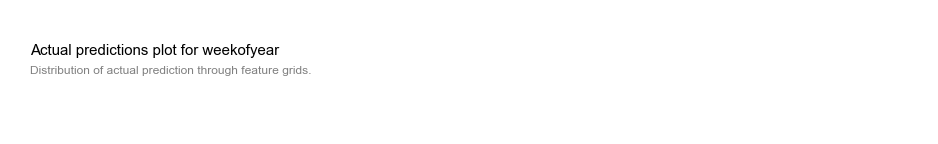

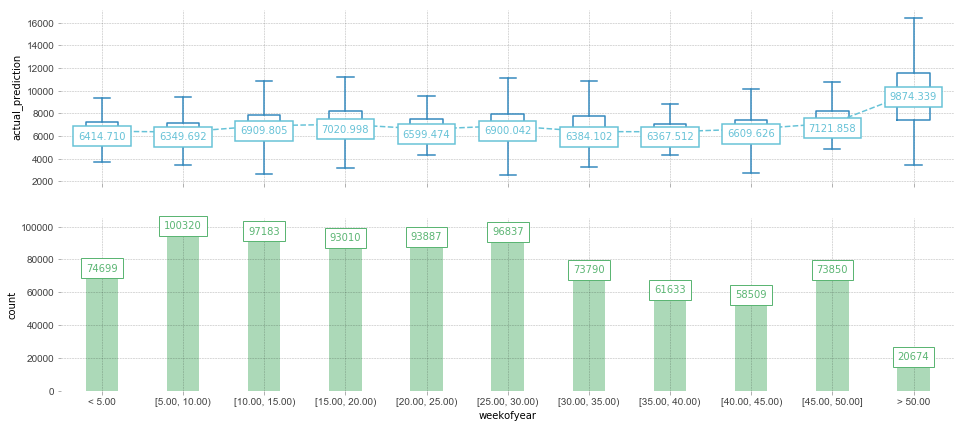

In [13]:
# grid_type, grid_range, show_outliers
axes, df = actual_plot(model=ross_model, 
                       X=ross_data[ross_features], 
                       feature='weekofyear', 
                       feature_name='weekofyear', 
                       num_grid_points=10, 
                       grid_type='equal', 
                       percentile_range=None, 
                       grid_range=(5, 50), 
                       cust_grid_points=None, 
                       show_percentile=False, 
                       show_outliers=True, 
                       which_classes=None, 
                       predict_kwds={}, 
                       ncols=2, 
                       figsize=None, 
                       plot_params=None)

In [14]:
df

,x,display_column,count,actual_prediction_q1,actual_prediction_q2,actual_prediction_q3
0,0,< 5.00,74699,5828.575845,6414.709793,7249.606068
1,1,"[5.00, 10.00)",100320,5571.090689,6349.691503,7150.833879
2,2,"[10.00, 15.00)",97183,5757.486750,6909.805470,7817.497664
3,3,"[15.00, 20.00)",93010,6130.498788,7020.997658,8159.699844
4,4,"[20.00, 25.00)",93887,6073.027208,6599.473723,7455.393664
5,5,"[25.00, 30.00)",96837,5746.654906,6900.042337,7928.553001
6,6,"[30.00, 35.00)",73790,5643.444727,6384.102266,7739.670720
7,7,"[35.00, 40.00)",61633,5828.145813,6367.511962,7059.985596
8,8,"[40.00, 45.00)",58509,5564.583667,6609.626186,7438.843064
9,9,"[45.00, 50.00]",73850,6407.301537,7121.858235,8164.691793


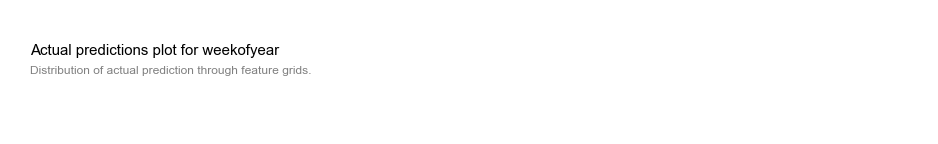

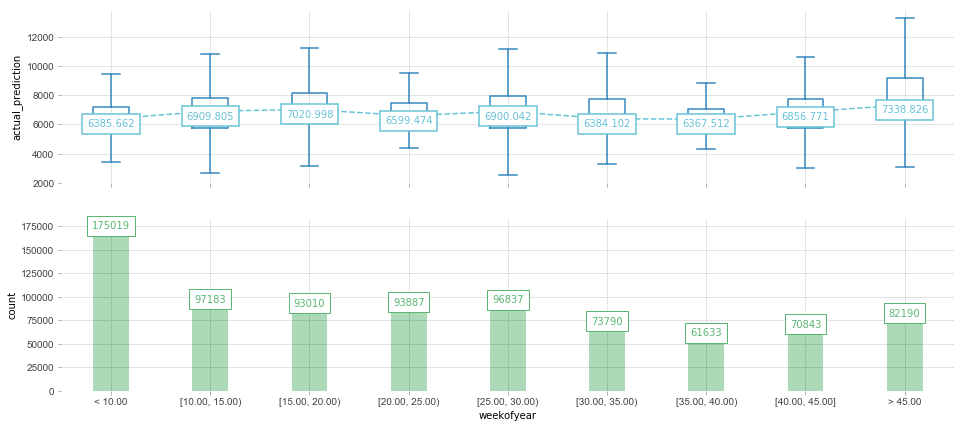

In [15]:
# cust_grid_points and show_outliers
axes, df = actual_plot(model=ross_model, 
                       X=ross_data[ross_features], 
                       feature='weekofyear', 
                       feature_name='weekofyear', 
                       num_grid_points=10, 
                       grid_type='percentile', 
                       percentile_range=None, 
                       grid_range=None, 
                       cust_grid_points=range(10, 50, 5), 
                       show_percentile=False, 
                       show_outliers=True, 
                       which_classes=None, 
                       predict_kwds={}, 
                       ncols=2, 
                       figsize=None, 
                       plot_params=None)

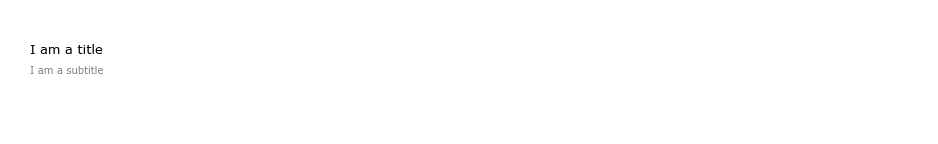

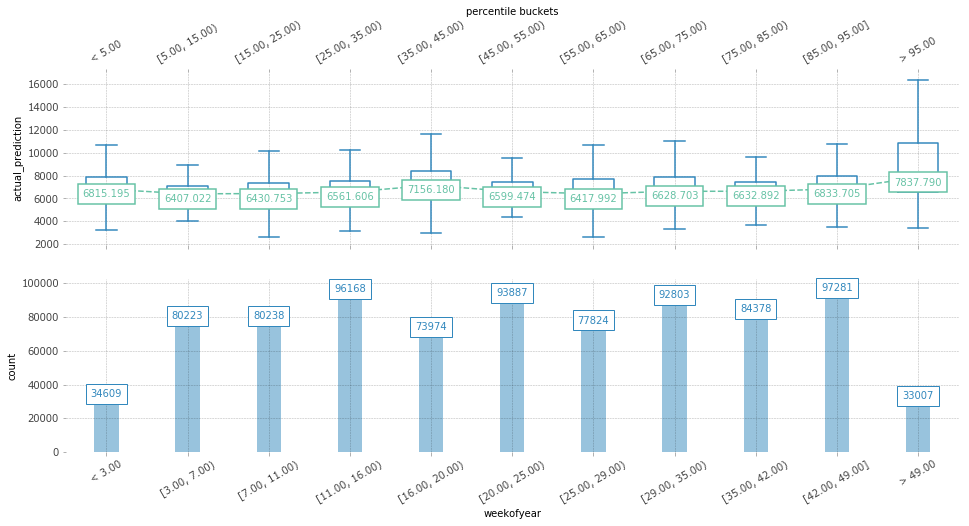

In [16]:
# plot_params
plot_params = {
    'font_family': 'Verdana',
    'xticks_rotation': 30,
    'title': 'I am a title',
    'subtitle': 'I am a subtitle',
    'title_fontsize': 13,
    'subtitle_fontsize': 10,
    'box_line_width': 1.5,
    'box_line_color': '#66c2a5',
    'box_color': '#3288bd',
    'box_width': 0.5,
    'bar_color': '#3288bd',
    'bar_width': 0.3
}

axes, df = actual_plot(model=ross_model, 
                       X=ross_data[ross_features], 
                       feature='weekofyear', 
                       feature_name='weekofyear', 
                       num_grid_points=10, 
                       grid_type='percentile', 
                       percentile_range=(5, 95), 
                       grid_range=None, 
                       cust_grid_points=None, 
                       show_percentile=True, 
                       show_outliers=True, 
                       which_classes=None, 
                       predict_kwds={}, 
                       ncols=2, 
                       figsize=None, 
                       plot_params=plot_params)